<a href="https://colab.research.google.com/github/raj-vijay/mv/blob/master/Image%20Processing/15.%20Image_Processing_Experiments_Protection_of_Privacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Protection of Privacy**

Detect human faces in the image and for the protection of privacy, anonymize data by blurring people's faces in the image automatically.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def show_image(image, title='Image', cmap_type='gray'):
  plt.figure(figsize=(15,15))
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('on')
  plt.show()

In [0]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('Original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

In [0]:
# Load Image
!wget https://assets.datacamp.com/production/repositories/4470/datasets/f531207e00d10992a3a02f87c7e488baba043209/face_det25.jpg

--2020-04-30 14:57:59--  https://assets.datacamp.com/production/repositories/4470/datasets/f531207e00d10992a3a02f87c7e488baba043209/face_det25.jpg
Resolving assets.datacamp.com (assets.datacamp.com)... 13.224.0.88, 13.224.0.66, 13.224.0.15, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.224.0.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155509 (152K) [image/jpeg]
Saving to: ‘face_det25.jpg.3’

face_det25.jpg.3    100%[===================>] 151.86K  --.-KB/s    in 0.02s   

2020-04-30 14:57:59 (8.80 MB/s) - ‘face_det25.jpg.3’ saved [155509/155509]



In [0]:
group_image = plt.imread('face_det25.jpg')

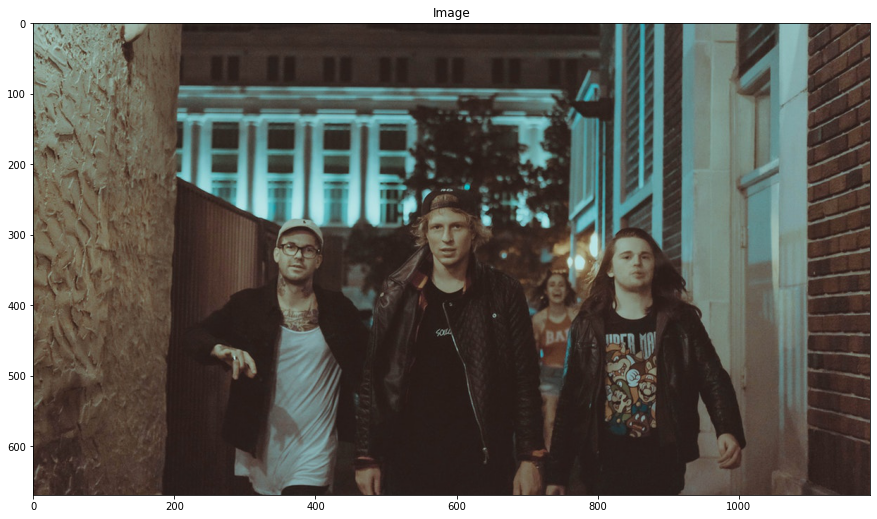

In [0]:
show_image(group_image)

**Step I - Cascade of classifiers and gaussian filter**

In [0]:
# Import Cascade of classifiers and gaussian filter
from skimage.feature import Cascade
from skimage.filters import gaussian
from skimage import data

**Step II - Detect Faces**

In [0]:
def getFaceRectangle(d):
  ''' Extracts the face rectangle from the image using the coordinates of the detected.'''
  # X and Y starting points of the face rectangle
  x, y = d['r'], d['c']
  # The width and height of the face rectangle
  width, height = d['r'] + d['width'], d['c'] + d['height']
  # Extract the detected face
  face= group_image[x:width, y:height]
  return face

In [0]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

Face - 1


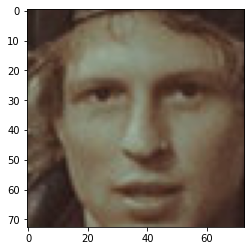

Face - 2


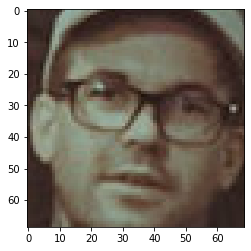

Face - 3


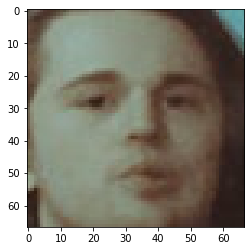

In [0]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2, step_ratio=1, min_size=(50, 50), max_size=(100, 100))
# For each detected face
i = 0
for d in detected:
  i += 1
  # Obtain the face cropped from detected coordinates
  face = getFaceRectangle(d)
  print("Face -", i)
  plt.imshow(face)
  plt.show()

Blurred Face - 1


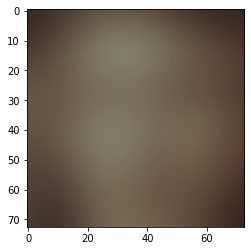

Blurred Face - 2


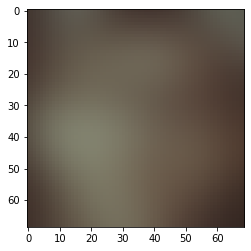

Blurred Face - 3


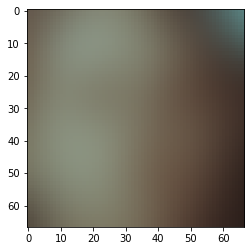

In [0]:
# For each detected face
i = 0
for d in detected:
    i += 1  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    print("Blurred Face -", i)
    plt.imshow(blurred_face)
    plt.show()

**Step III - Mask detected faces**

In [0]:
def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original

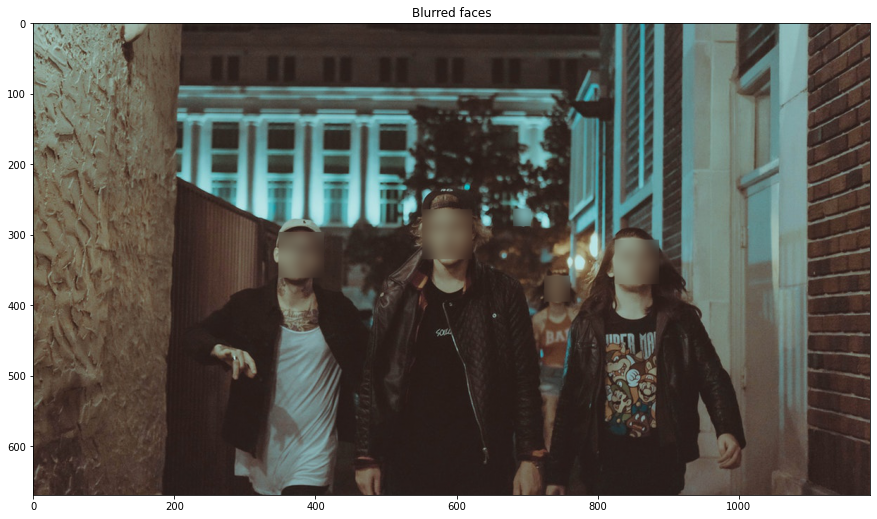

In [0]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))

original = np.copy(group_image)
original = original/255
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    
    resulting_image = mergeBlurryFace(original, blurred_face)

show_image(resulting_image, "Blurred faces")

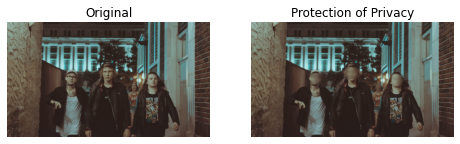

In [0]:
plot_comparison(group_image, resulting_image, "Protection of Privacy")

*Personal notes on Image Processing with Python from Datacamp